In [1]:
%load_ext autoreload
%autoreload 2
import bert
import samples
import sklearn.mixture
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as  plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from utils import *
import pdb
import umap
import hdbscan


from numpy import dot
from numpy.linalg import norm
from sklearn.metrics import silhouette_score


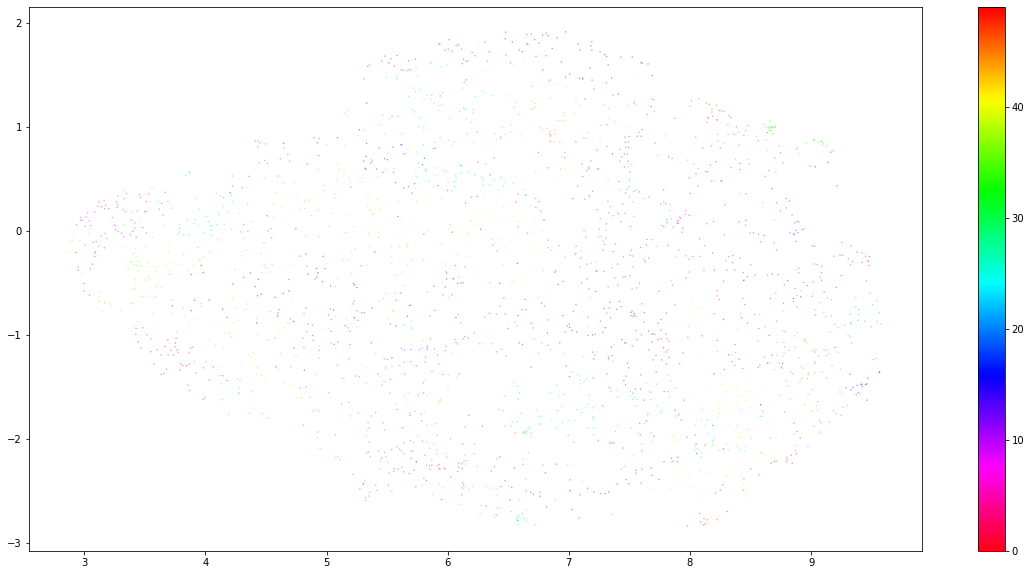

In [10]:
nips_df = pd.read_csv("nips_2022_clean.csv")
embeddings = load_embeddings("outputs/clean_nips_2022_embeddings.pkl")
# embeddings = np.array(embeddings)
# reduce dimensions to 5 using umap
reduced_embeddings = reduce_dim(embeddings, "umap", 5)
# reduced_embeddings = embeddings
# cluster
cluster_algorithm = "gmm" # dbscan/gmm

clusters, model = cluster_and_predict(reduced_embeddings, cluster_algorithm, num_cluster=50)

if cluster_algorithm == "gmm":
    paper_labels = clusters
elif cluster_algorithm == "dbscan":
    paper_labels = clusters.labels_

# for dbscan
# visualize(embeddings, clusters.labels_)

# for gmm
visualize(embeddings, paper_labels)



In [20]:
nips_df.iloc[11]

Unnamed: 0                                                   15
title         Offline Multi-Agent Reinforcement Learning wit...
authors       Wei-Cheng Tseng, Tsun-Hsuan Johnson Wang, Yen-...
abstract      We introduce an offline multi-agent reinforcem...
year                                                       2022
Name: 11, dtype: object

In [21]:
x = embeddings[10]
x_class = paper_labels[10]
x_class

35

In [22]:
relevant_embeddings, relevant_df = select_cluster(x_class, embeddings, nips_df, paper_labels)

In [23]:
scores = cos_sim(x, relevant_embeddings)
best_matches = np.argsort(scores)[-20:][::-1]
for x in nips_df.iloc[best_matches]["title"]:
    print(x)

Federated Submodel Optimization for Hot and Cold Data Features
Fast Bayesian Coresets via Subsampling and Quasi-Newton Refinement
Fully Sparse 3D Object Detection
Asynchronous SGD Beats Minibatch SGD Under Arbitrary Delays
What You See is What You Classify: Black Box Attributions
Generating Training Data with Language Models: Towards Zero-Shot Language Understanding
Parallel Tempering With a Variational Reference
Wavelet Score-Based Generative Modeling
Identifiability and generalizability from multiple experts in Inverse Reinforcement Learning
Structured Recognition for Generative Models with Explaining Away
Using natural language and program abstractions to instill human inductive biases in machines
Adversarial Style Augmentation for Domain Generalized Urban-Scene Segmentation
Coresets for Relational Data and The Applications
On-Demand Sampling: Learning Optimally from Multiple Distributions
IM-Loss: Information Maximization Loss for Spiking Neural Networks
Offline Multi-Agent Reinfor